In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'wine Quality.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.2,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,9.0,0.45,0.12,15.92,0.049,67.0,62.0,0.99520,2.75,0.49,9.9,9
1995,10.0,0.78,0.10,12.15,0.017,37.0,37.0,0.99579,2.46,1.22,12.6,2
1996,11.0,0.74,0.14,8.12,0.026,52.0,18.0,0.99897,3.49,0.92,9.4,7
1997,15.0,0.62,0.19,1.81,0.027,17.0,54.0,0.99471,2.67,0.76,8.6,6


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
bins = (1, 6, 10)
group_name = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_name)
data['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [7]:
label_quality = LabelEncoder()

In [8]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.2,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<Axes: xlabel='quality'>

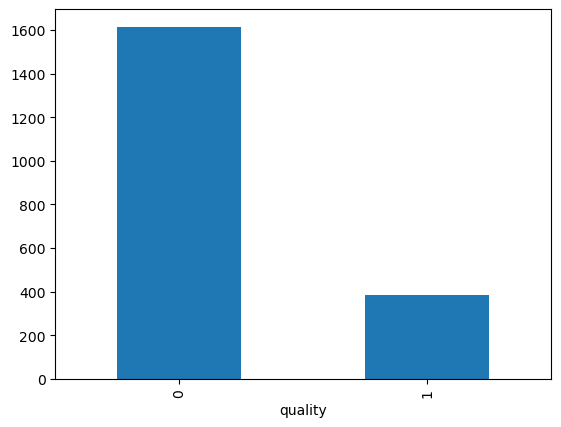

In [10]:
data['quality'].value_counts().plot(kind = 'bar')

SPLIT OUR DATA

In [23]:
x = data.drop('quality', axis = 1)
y = data['quality']

NORMALIZATION OF DATA

In [26]:
sc = StandardScaler()

In [28]:
x_scaled = sc.fit_transform(x)

In [30]:
x_scaled

array([[-0.61190356,  0.87740187, -1.36053581, ...,  0.80174091,
        -0.49910432, -0.92813235],
       [-0.38863571,  1.87554204, -1.36053581, ..., -0.32870465,
        -0.3453227 , -0.63607409],
       [-0.38863571,  1.21011526, -1.13990987, ..., -0.10990874,
        -0.3837681 , -0.63607409],
       ...,
       [ 1.04027849,  1.0992108 , -0.58834503, ...,  0.72880894,
        -0.03775945, -0.92813235],
       [ 2.82642123,  0.43378402, -0.31256261, ..., -2.2614019 ,
        -0.24280161, -1.51224885],
       [-1.63893564, -0.61980837, -0.64350151, ...,  0.03595521,
        -0.62725567, -1.2201906 ]])

SPLITTING OF DATA

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

TRAIN THE MODEL

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier()

In [48]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(x_test)

In [52]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

ACURRACY SCORE FOR RANDOMFORESTCLASSIFIER

In [57]:
from sklearn.metrics import accuracy_score, classification_report

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.82


MLPClassifier

In [63]:
from sklearn.neural_network import MLPClassifier

In [71]:
mp = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 10000)
mp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=10000)

In [75]:
mp_pred = mp.predict(x_test)

In [83]:
mp_pred[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [86]:
mp_classification_report = classification_report(y_test, mp_pred)

In [88]:
mp_classification_report

'              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89       331\n           1       0.49      0.49      0.49        69\n\n    accuracy                           0.82       400\n   macro avg       0.69      0.69      0.69       400\nweighted avg       0.82      0.82      0.82       400\n'

ACCURACY SCORE FOR MLPCLASSIFIER

In [90]:
mp_accuracy = accuracy_score(y_test, mp_pred)

In [94]:
print(f"Accuracy: {mp_accuracy: .2f}")

Accuracy:  0.82
